---

In [1]:
import os
import numpy as np
import pandas as pd

from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

The dataset for today is taken from: https://archive.ics.uci.edu/ml/datasets/automobile

In [2]:
df = pd.read_csv(r'C:\Users\sofia\Desktop\Python\automobile_price_data.csv')

In [3]:
df.shape

(205, 26)

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Dealing with missing values and normalizing data

In [5]:
df = df.drop('normalized-losses', axis = 1)

df = df.replace({'?': np.nan})

Th number of missing values is quite small camparing to the overall shape of the data frame, so we can just drop it

In [6]:
df.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [7]:


df = df.dropna().reset_index(drop=True)

df = df.astype({'price': 'int32', 
                            'bore': 'float32', 
                            'stroke': 'float32', 
                            'horsepower': 'int32', 
                            'peak-rpm': 'int32'})

df = df.dropna().reset_index(drop=True)

df.columns = df.columns.astype(str).str.replace("-", "_")

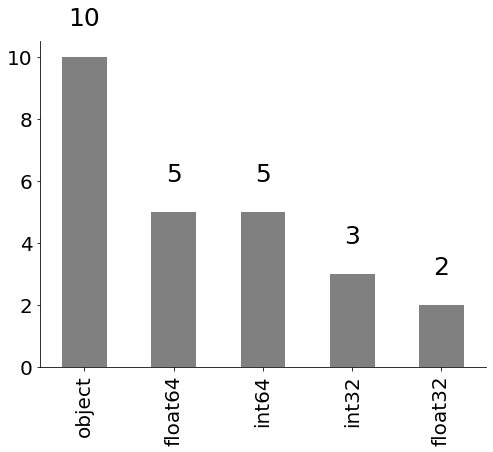

In [8]:
#Lets see which types of objects do we have in data set
plt.figure(figsize = (8,6))
ax = df.dtypes.value_counts().plot(kind='bar',grid = False,fontsize=20,color='grey')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 1, height, ha = 'center', size = 25)
sns.despine()

In [9]:
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


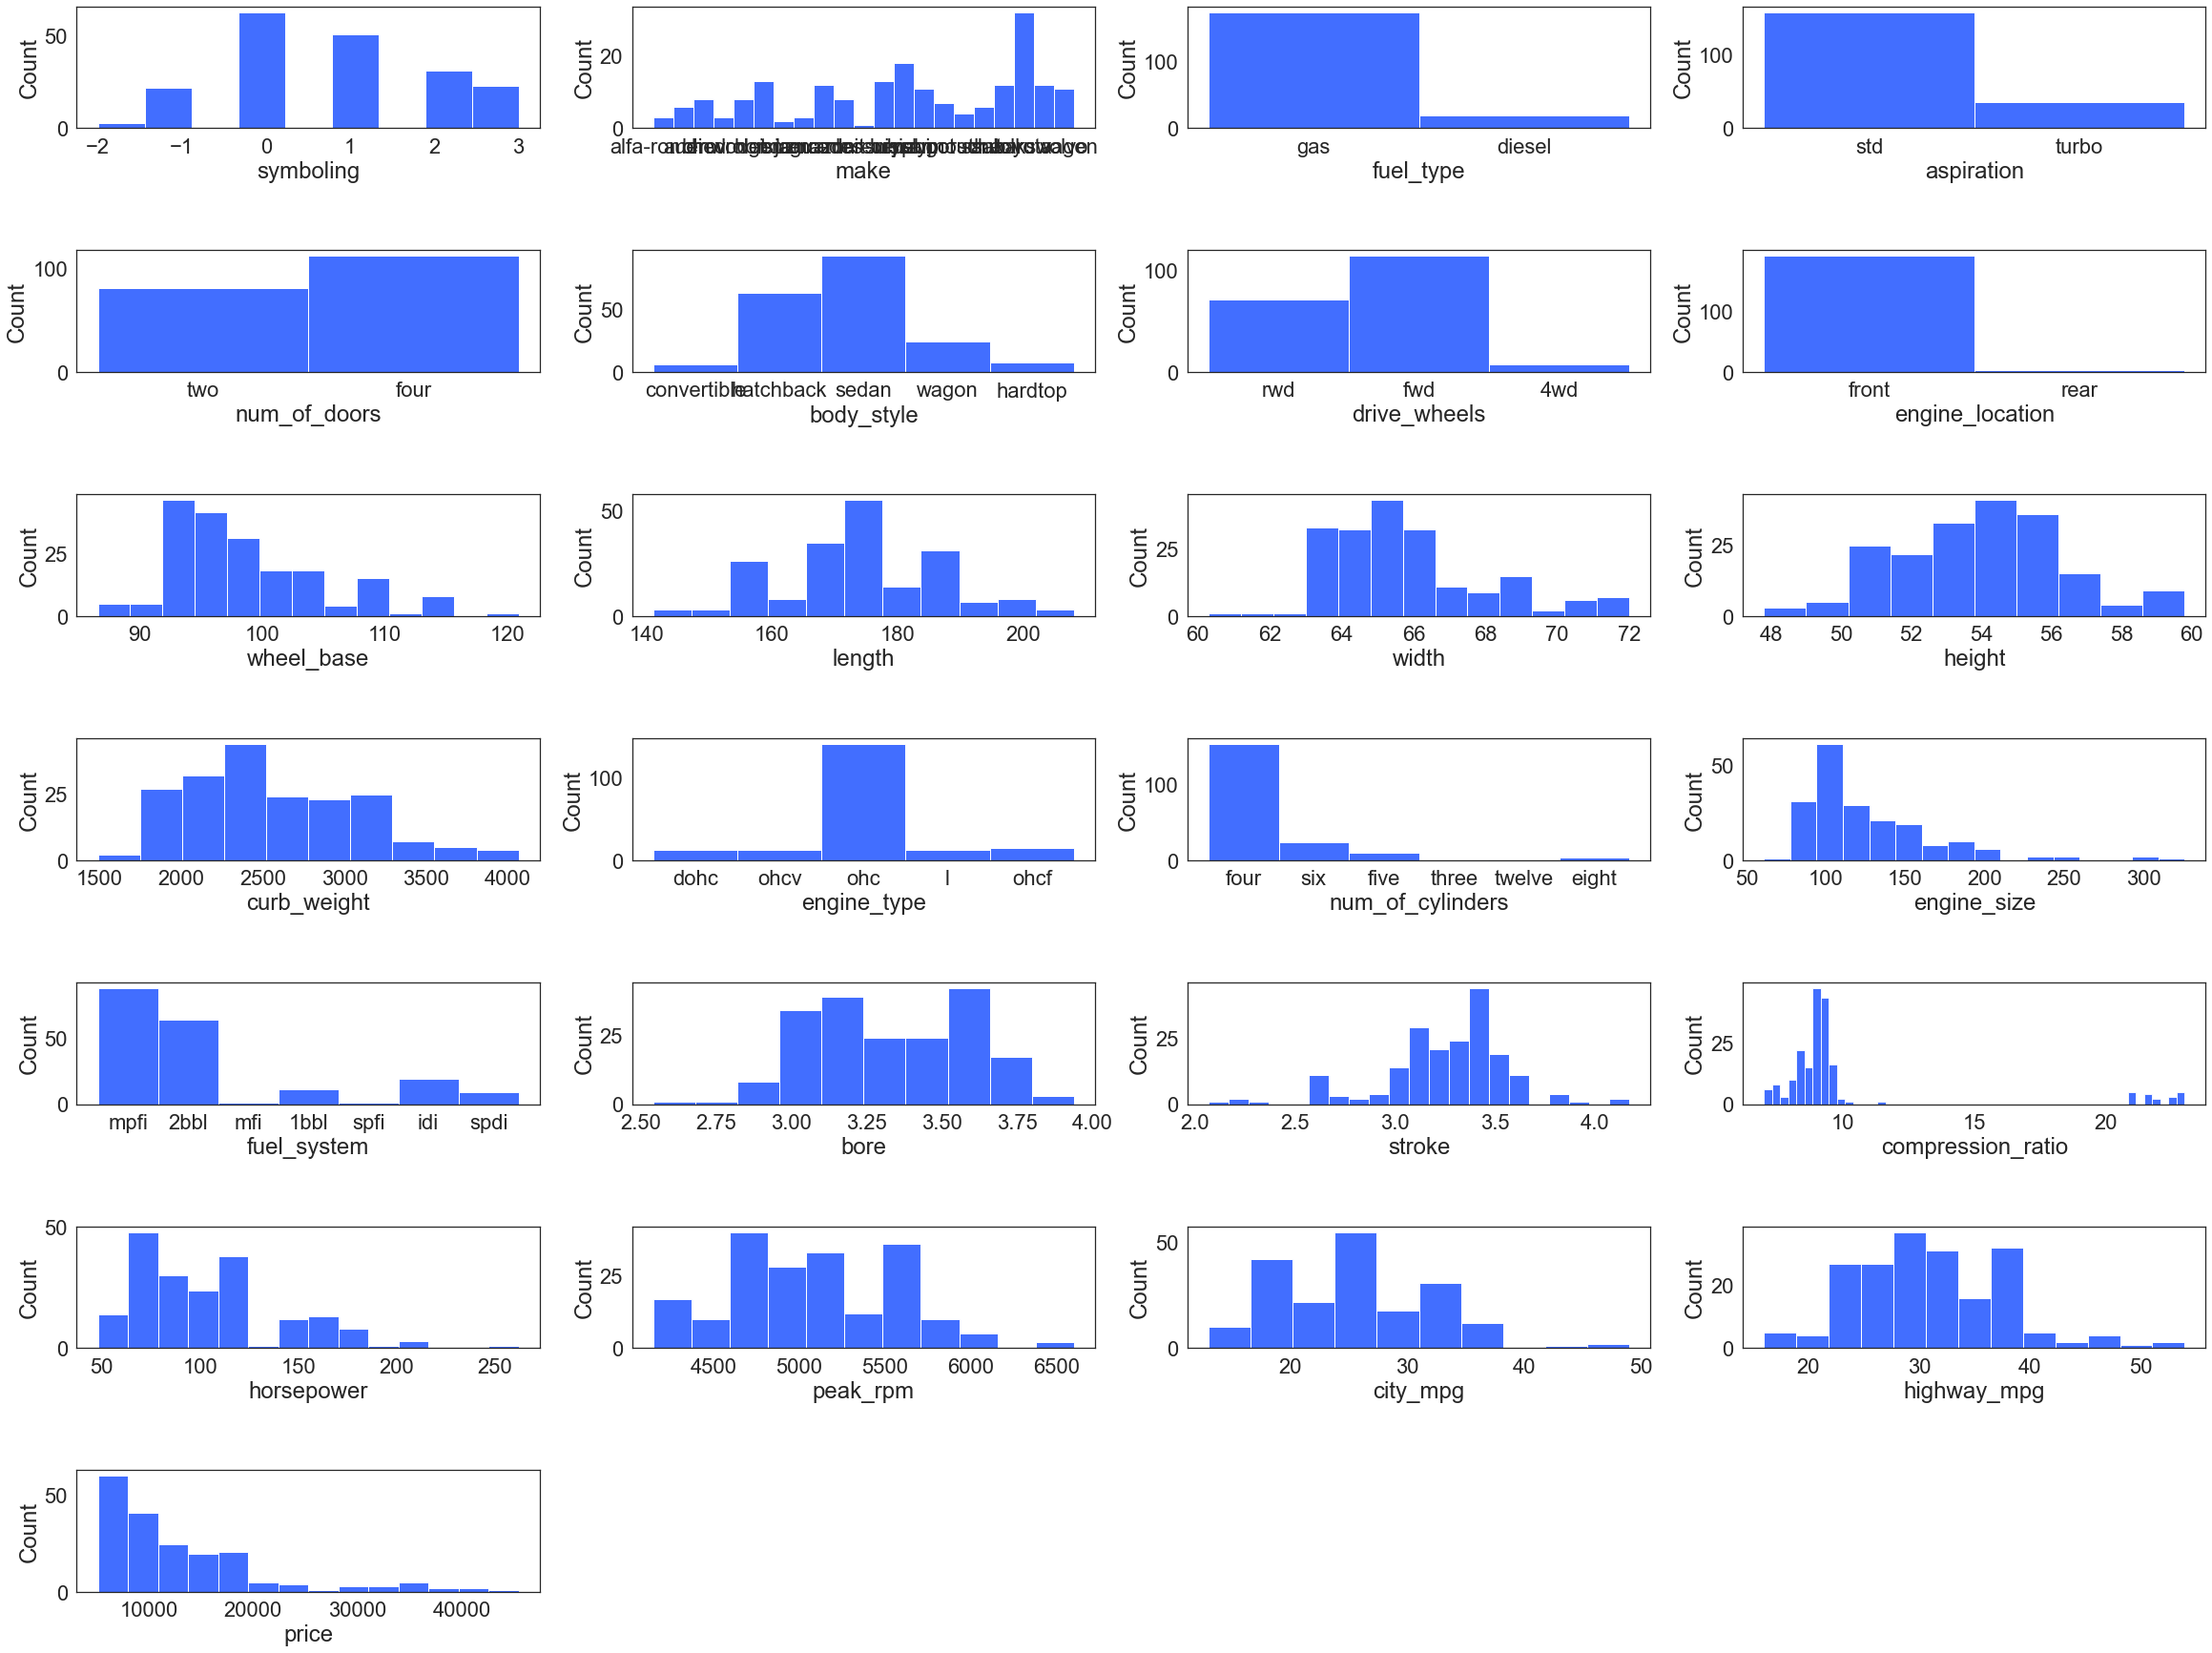

In [10]:
i = 1
sns.set(font_scale = 2)
sns.set_style("white")
sns.set_palette("bright")
plt.figure(figsize=(40, 40))
plt.subplots_adjust(hspace=1)
for feature in df.columns:
    plt.subplot(9,4,i)
    sns.histplot(df[feature], palette='Blues_r')
    i = i +1

Now I want to standardize some numerical features

In [11]:
from sklearn.preprocessing import StandardScaler

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [45]:
X = df[['horsepower', 'engine_size', 'bore', 'wheel_base', 'length']]
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [46]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

In [47]:
#Creating model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
#Then we should check if prediction was made good

In [49]:
model_predict_df = pd.DataFrame({'Horse power': X_test.horsepower,
             'Engine size': X_test.engine_size,
             'Actual price': y_test,
             'Predicted price' : model.predict(X_test)}).reset_index(drop=True)

<AxesSubplot:xlabel='Predicted price', ylabel='Actual price'>

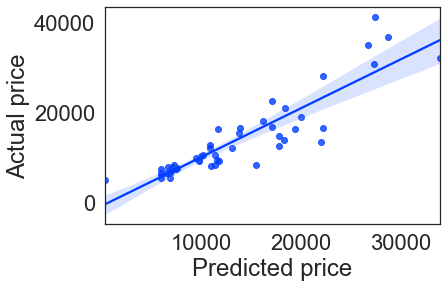

In [50]:
sns.regplot(x=model_predict_df['Predicted price'], y=model_predict_df['Actual price'], data = model_predict_df)

---

In [51]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [52]:
#RMSE
mean_squared_error(y_pred = model_predict_df['Predicted price'], y_true = model_predict_df['Actual price'], squared = False)

3887.05003901221

In [53]:
#MAE
mean_absolute_error(y_pred = model_predict_df['Predicted price'], y_true = model_predict_df['Actual price'])

2668.3309588036027

In [54]:
#R-squared
r2_score(y_pred = model_predict_df['Predicted price'], y_true = model_predict_df['Actual price'])

0.8015452008480298